## CIFAR_10 and Basic Model 

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 11s 0us/step


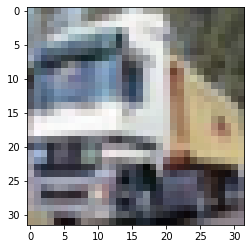

In [ ]:
plt.imshow(train_images[1])

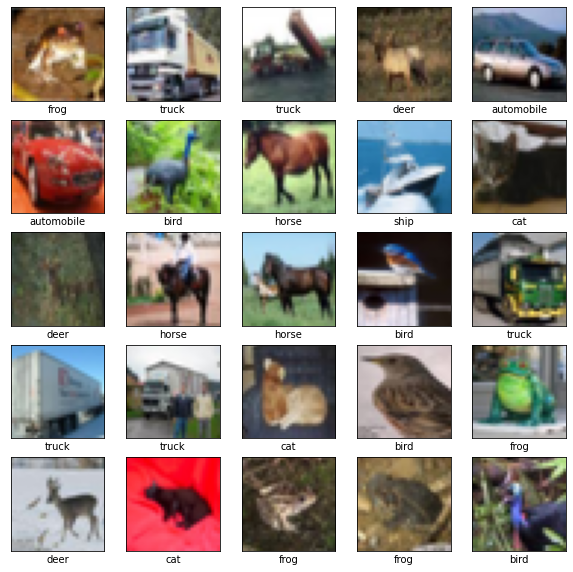

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Architecture: Conv+MaxPool+Conv+FC+FC+FC

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(65, activation="relu"))
model.add(layers.Dense(10, activation="relu"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 65)                703105    
                                                                 
 dense_4 (Dense)             (None, 10)                660       
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6406 - accuracy: 0.4581 - val_loss: 1.3888 - val_accuracy: 0.5552
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.3215 - accuracy: 0.5750 - val_loss: 1.3131 - val_accuracy: 0.5777
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2055 - accuracy: 0.6118 - val_loss: 1.2351 - val_accuracy: 0.5994
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0437 - accuracy: 0.6589 - val_loss: 1.1225 - val_accuracy: 0.6346
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9283 - accuracy: 0.6939 - val_loss: 1.1152 - val_accuracy: 0.6374
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8550 - accuracy: 0.7177 - val_loss: 1.1233 - val_accuracy: 0.6407
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7898 - accuracy: 0.7368 - val_loss: 1.1887 -

313/313 - 4s - loss: 1.2958 - accuracy: 0.6267 - 4s/epoch - 12ms/step


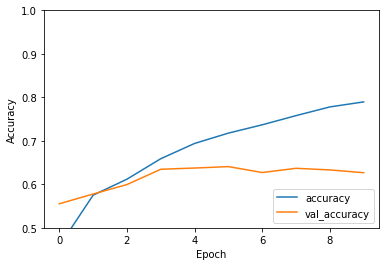

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6266999840736389


## Robust Model for CFAR_10

### Load Data

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks 
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [ ]:
# Cifar10
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#CFAR_10
img_rows, img_cols, channels = 32, 32, 3

### Training Model

In [ ]:
def Mymodel():
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.2))
        
        model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.3))
        
        model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('elu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))
        
        model.add(Flatten())
        model.add(Dense(num_classes, activation='softmax'))
        
        return model
        #model.summary()

In [ ]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [ ]:
!pwd

/content


In [ ]:
csv=callbacks.CSVLogger('./history_natural_model.csv', separator=",", append=True)

In [ ]:
#training
batch_size = 64
#opt_rms = tensorflow.keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
#opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=0.05, patience=10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[callback])

Epoch 1/125
781/781 [==============================] - 26s 33ms/step - loss: 0.6372 - accuracy: 0.8340 - val_loss: 0.5645 - val_accuracy: 0.8619
Epoch 2/125
781/781 [==============================] - 26s 33ms/step - loss: 0.6350 - accuracy: 0.8349 - val_loss: 0.6113 - val_accuracy: 0.8464
Epoch 3/125
781/781 [==============================] - 26s 33ms/step - loss: 0.6291 - accuracy: 0.8369 - val_loss: 0.6181 - val_accuracy: 0.8498
Epoch 4/125
781/781 [==============================] - 25s 33ms/step - loss: 0.6266 - accuracy: 0.8393 - val_loss: 0.5890 - val_accuracy: 0.8560
Epoch 5/125
781/781 [==============================] - 26s 33ms/step - loss: 0.6231 - accuracy: 0.8397 - val_loss: 0.6947 - val_accuracy: 0.8258
Epoch 6/125
781/781 [==============================] - 25s 32ms/step - loss: 0.6221 - accuracy: 0.8408 - val_loss: 0.5931 - val_accuracy: 0.8540
Epoch 7/125
781/781 [==============================] - 25s 32ms/step - loss: 0.6173 - accuracy: 0.8422 - val_loss: 0.6804 - val_ac

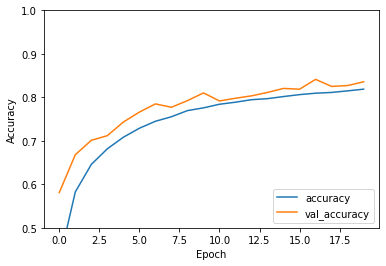

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
#scores = model.evaluate(x_test, y_test)#, batch_size=128, verbose=1)
#test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
# Assess base model accuracy on regular images
print("Base accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))
#print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])

In [ ]:
model.save('Robust_model_CFAR10.h5')

## Load Robust Model

In [ ]:
#model.save('model_CFAR10.h5')
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('/content/model_CFAR10.h5')
#model = tf.keras.models.load_model('/content/Robust_model_CFAR10.h5')

# Show the model architecture
model.summary()
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

# Adversarial examples Generation

### Create the adversarial image

#### Implementing fast gradient sign method
The first step is to create perturbations which will be used to distort the original image resulting in an adversarial image. As mentioned, for this task, the gradients are taken with respect to the image.

### Adversarial data generator example

In [ ]:
import timeit

start = timeit.timeit()
print("hello")
end = timeit.timeit()
print(end - start)

In [ ]:
# Function to create adversarial pattern
import tensorflow as tf
import timeit
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.MSE(label, prediction)
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    
    return signed_grad 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


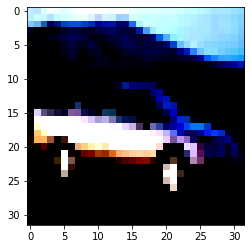

In [ ]:
plt.imshow(x_train[4])

automobile
automobile
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.015 0.376 0.    0.    0.    0.    0.001 0.    0.002 0.605]]


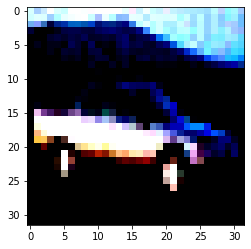

In [ ]:
# Create a signle adversarial example
image = x_train[4]
image_label = y_train[4]
perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), image_label).numpy()
perturbations
adversarial = image + perturbations * 0.08

print(labels[image_label.argmax()])
print(labels[new_model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(np.around(new_model.predict(image.reshape((1, img_rows, img_cols, channels))),decimals=3))
print(labels[new_model.predict(adversarial).argmax()])
print(np.around(new_model.predict(adversarial),decimals=3))

if channels == 1:
    plt.imshow(adversarial.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial.reshape((img_rows, img_cols, channels)))
   
plt.show()


automobile
automobile
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
frog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.    0.02  0.053 0.019 0.03  0.    0.846 0.    0.    0.031]]


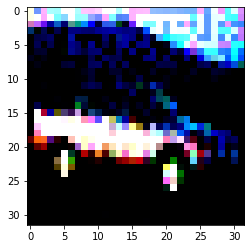

In [ ]:
# Create a signle adversarial example
image = x_train[4]
image_label = y_train[4]
A=np.zeros(10)
A[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmin()]=1
label=A

#label = A[choice([i for i in range(0,9) if i not in [y_train[0].argmax()]])]=1 #Random
#label = A[0]=5 # Targeted
perturbations_2 = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)),label).numpy()
perturbations_2
adversarial_2 = image - perturbations_2 * 0.3

print(labels[image_label.argmax()])
print(labels[new_model.predict(image.reshape((1, img_rows, img_cols, channels))).argmax()])
print(np.around(new_model.predict(image.reshape((1, img_rows, img_cols, channels))),decimals=3))
print(labels[new_model.predict(adversarial_2).argmax()])
print(np.around(new_model.predict(adversarial_2),decimals=3))

if channels == 1:
    plt.imshow(adversarial_2.reshape((img_rows, img_cols)))
else:
    plt.imshow(adversarial_2.reshape((img_rows, img_cols, channels)))
plt.show()

In [ ]:
# Adversarial data generator
def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            
            
            epsilon = 0.1
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: truck Truth: automobile


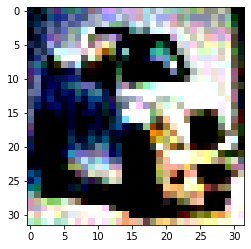

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: automobile Truth: truck


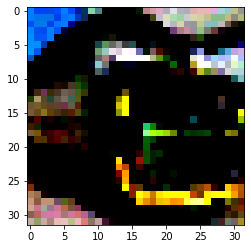

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: frog Truth: cat


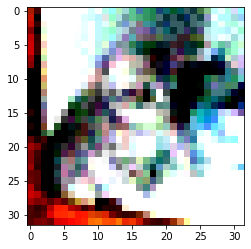

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: bird Truth: frog


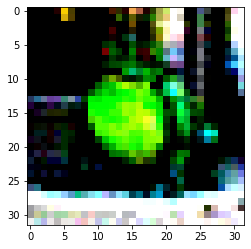

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: deer Truth: cat


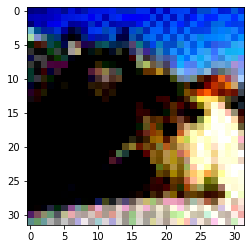

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: frog Truth: cat


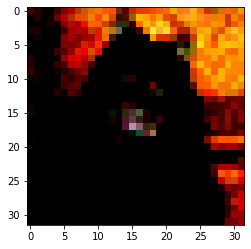

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: automobile Truth: frog


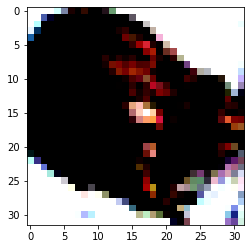

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: ship Truth: airplane


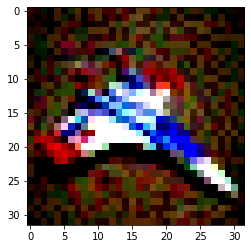

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: frog Truth: deer


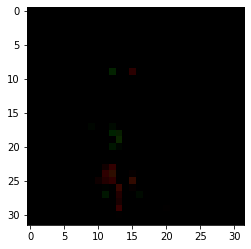

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: deer Truth: bird


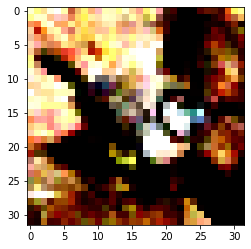

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: frog Truth: deer


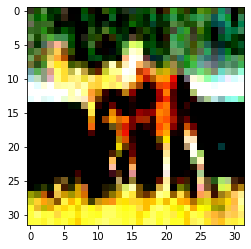

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: bird Truth: truck


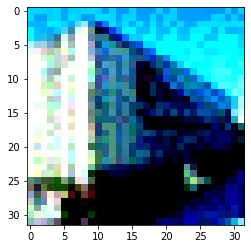

In [ ]:
# Generate and visualize 12 adversarial images
import random
adversarials, correct_labels = next(generate_adversarials(12))
for adversarial, correct_label in zip(adversarials, correct_labels):
    print('Prediction:', labels[model.predict(adversarial.reshape((1, img_rows, img_cols, channels))).argmax()], 'Truth:', labels[correct_label.argmax()])
    if channels == 1:
        plt.imshow(adversarial.reshape(img_rows, img_cols))
    else:
        plt.imshow(adversarial)
    plt.show()

In [ ]:
x_adversarial_train, y_adversarial_train = next(generate_adversarials(20000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [ ]:
# Assess base model on adversarial data
print("Base accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [7.1145172119140625, 0.062199998646974564]


### FSGM-Target Class Method

In [ ]:
# Function to create adversarial pattern
import tensorflow as tf
import timeit
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    with tf.device('/GPU:0'): 
        with tf.GradientTape() as tape:
            tape.watch(image)
            prediction = model(image)
            loss = tf.keras.losses.MSE(label, prediction)
        gradient = tape.gradient(loss, image)
        signed_grad = tf.sign(gradient)    
    return signed_grad 

In [ ]:
import random
import time
import datetime
# Adversarial data generator all
def generate_adversarials_FGSM(eps,batch_size):
        epsilon=eps
        batch_size=batch_size
    #while True:
        x_FGSM = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0,45000)
            image = x_train[N]

            #FGSM
            label = y_train[N]
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            adversarial = image + perturbations * epsilon
            x_FGSM.append(adversarial)

            y.append(y_train[N])
        
        #x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        x_FGSM = np.asarray(x_FGSM ).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)

        return x_FGSM, y 

In [ ]:
tf.debugging.set_log_device_placement(True)
#eps= np.arange(0.05, 0.25, 0.01)
eps= np.arange(0.005, 0.3, 0.01)
n=1000
C=[]
x_adv_F_all=[] 
y_adv_all=[] 

for i in eps:
    x_adv_F, y_adv = generate_adversarials_FGSM(i,n)
    with tf.device('/GPU:0'):
        M1=model.evaluate(x=x_adv_F, y=y_adv, verbose=0)

    x_adv_F_all.append(x_adv_F) 
    y_adv_all.append(y_adv)
  
    C.append([M1[1]])
    now = datetime.datetime.now()
    print('iter',i, now)

iter 0.005 2021-12-20 14:43:15.751242
iter 0.015 2021-12-20 14:43:37.025711
iter 0.024999999999999998 2021-12-20 14:43:58.145661
iter 0.034999999999999996 2021-12-20 14:44:19.024183
iter 0.04499999999999999 2021-12-20 14:44:40.101474
iter 0.054999999999999986 2021-12-20 14:45:01.052548
iter 0.06499999999999999 2021-12-20 14:45:22.075529
iter 0.075 2021-12-20 14:45:43.092505
iter 0.08499999999999999 2021-12-20 14:46:04.064040
iter 0.09499999999999999 2021-12-20 14:46:24.877722
iter 0.10499999999999998 2021-12-20 14:46:45.712532
iter 0.11499999999999999 2021-12-20 14:47:06.448463
iter 0.12499999999999999 2021-12-20 14:47:27.307509
iter 0.13499999999999998 2021-12-20 14:47:48.150416
iter 0.145 2021-12-20 14:48:09.029940
iter 0.15499999999999997 2021-12-20 14:48:29.518537
iter 0.16499999999999998 2021-12-20 14:48:50.345833
iter 0.175 2021-12-20 14:49:11.068711
iter 0.18499999999999997 2021-12-20 14:49:31.885478
iter 0.19499999999999998 2021-12-20 14:49:52.979052
iter 0.20499999999999996 20

In [ ]:
import random
import time
import datetime
# Adversarial data generator all
def generate_adversarials_TCMR(eps,batch_size):
        epsilon=eps
        batch_size=batch_size
    #while True:
        x_TCM_R = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0,45000)
            image = x_train[N]

            #TCMR
            A=np.zeros(10)
            label_A = A[random.choice([i for i in range(0,9) if i not in [y_train[N].argmax()]])]=1
            perturbations_A = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label_A).numpy()
            adversarial_A = image - perturbations_A * epsilon
            x_TCM_R.append(adversarial_A)
  
            y.append(y_train[N])
        
        #x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        x_TCM_R = np.asarray(x_TCM_R).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)

        return x_TCM_R, y 

In [ ]:
tf.debugging.set_log_device_placement(True)
#eps= np.arange(0.05, 0.25, 0.01)
eps= np.arange(0.005, 0.3, 0.01)
n=1000
D=[]
x_adv_T_all=[] 
y_adv_T_all=[] 

for i in eps:
    x_adv_T, y_adv_T = generate_adversarials_TCMR(i,n)
    with tf.device('/GPU:0'):
        M2=model.evaluate(x=x_adv_T, y=y_adv_T, verbose=0)

    x_adv_T_all.append(x_adv_T) 
    y_adv_T_all.append(y_adv_T)
  
    D.append([M2[1]])
    now = datetime.datetime.now()
    print('iter',i, now)

iter 0.005 2021-12-20 16:32:31.282042
iter 0.015 2021-12-20 16:32:52.767105
iter 0.024999999999999998 2021-12-20 16:33:14.390291
iter 0.034999999999999996 2021-12-20 16:33:35.717853
iter 0.04499999999999999 2021-12-20 16:33:57.325665
iter 0.054999999999999986 2021-12-20 16:34:18.812066
iter 0.06499999999999999 2021-12-20 16:34:40.157829
iter 0.075 2021-12-20 16:35:01.414307
iter 0.08499999999999999 2021-12-20 16:35:22.445627
iter 0.09499999999999999 2021-12-20 16:35:43.747692
iter 0.10499999999999998 2021-12-20 16:36:04.967178
iter 0.11499999999999999 2021-12-20 16:36:26.036666
iter 0.12499999999999999 2021-12-20 16:36:47.194886
iter 0.13499999999999998 2021-12-20 16:37:08.516010
iter 0.145 2021-12-20 16:37:29.512101
iter 0.15499999999999997 2021-12-20 16:37:50.742153
iter 0.16499999999999998 2021-12-20 16:38:11.871119
iter 0.175 2021-12-20 16:38:32.947993
iter 0.18499999999999997 2021-12-20 16:38:54.013231
iter 0.19499999999999998 2021-12-20 16:39:15.215161
iter 0.20499999999999996 20

####ProofFunc

In [ ]:
import random
import time
# Adversarial data generator all
def generate_adversarials_all(batch_size,eps):
    epsilon=eps
    while True:
        x_FGSM = []
#        x_TCM_R = []
        x_TCM_T = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0,45000)
            #epsilon = 0.1
            image = x_train[N]

            #FGSM
            label = y_train[N]
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            adversarial = image + perturbations * epsilon
            x_FGSM.append(adversarial)

            # Target Class Method (Random)
 #           A=np.zeros(10)
 #           label_A = A[random.choice([i for i in range(0,9) if i not in [y_train[N].argmax()]])]=1
 #           perturbations_A = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label_A).numpy()
 #           adversarial_A = image - perturbations_A * epsilon
 #           x_TCM_R.append(adversarial_A)
           
            # Target Class Method (Min_Target)
            image_label = y_train[N]
            B=np.zeros(10)
            B[model.predict(image.reshape((1, img_rows, img_cols, channels))).argmin()]=1
            label_B=B
            perturbations_B = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label_B).numpy()
            adversarial_B = image - perturbations_B * epsilon          
            x_TCM_T.append(adversarial_B)

            y.append(y_train[N])
        
        x_FGSM = np.asarray(x_FGSM ).reshape((batch_size, img_rows, img_cols, channels))
  #      x_TCM_R = np.asarray(x_TCM_R).reshape((batch_size, img_rows, img_cols, channels))
        x_TCM_T = np.asarray(x_TCM_T).reshape((batch_size, img_rows, img_cols, channels))

        y = np.asarray(y)

        yield x_FGSM, x_TCM_T, y 

In [ ]:
tf.debugging.set_log_device_placement(True)
eps= np.arange(0.005, 0.3, 0.01)
n=100
C=[]
#D=[]
E=[]

x_adv_F_all=[] 
#x_adv_R_all=[] 
x_adv_T_all=[]
y_adv_all=[] 

for i in eps:
    start  = time.time()
    x_adv_F, x_adv_T, y_adv = next(generate_adversarials_all(n,i))
    with tf.device('/GPU:0'):
        M1=model.evaluate(x=x_adv_F, y=y_adv, verbose=0)
        #M2=model.evaluate(x=x_adv_R, y=y_adv, verbose=0)
        M3=model.evaluate(x=x_adv_T, y=y_adv, verbose=0)

    x_adv_F_all.append(x_adv_F) 
    #x_adv_R_all.append(x_adv_R) 
    x_adv_T_all.append(x_adv_T)
    y_adv_all.append(y_adv)
  
    C.append([M1[1]])
    #D.append(M2[1])
    E.append(M3[1])

    now = datetime.datetime.now()
    print('iter',i, now)

##  ACC vs Epsilon

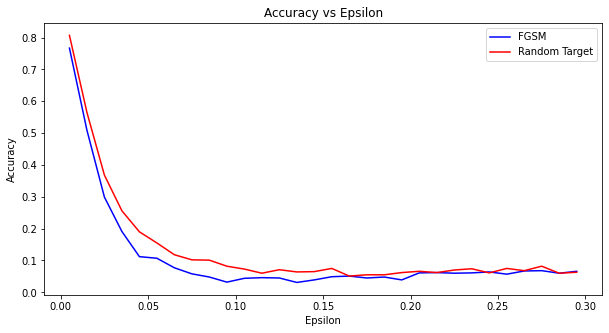

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('Accuracy vs Epsilon')
x = eps
y1 = np.asarray(C)
y2 = np.asarray(D)
#y3 = np.asarray(E)

plt.plot(x, y1, "-b", label="FGSM")
plt.plot(x, y2, "-r", label="Random Target")
#plt.plot(x, y3, "-g", label="Prob_Min_Target")
plt.legend(loc="upper right")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Accuracy')
#plt.ylim(-1.5, 2.0)
plt.show()

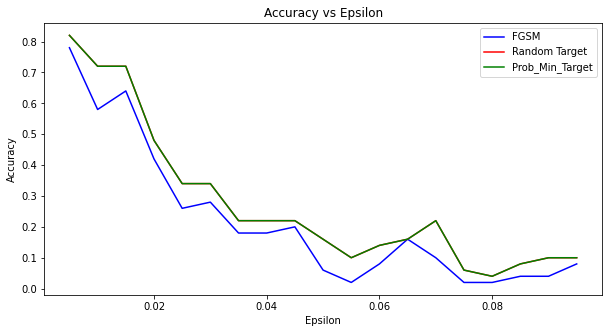

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('Accuracy vs Epsilon')
x = eps
y1 = np.asarray(C)
#y2 = np.asarray(D)
y3 = np.asarray(E)

plt.plot(x, y1, "-b", label="FGSM")
#plt.plot(x, y2, "-r", label="Random Target")
plt.plot(x, y3, "-g", label="Prob_Min_Target")
plt.legend(loc="upper right")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Accuracy')
#plt.ylim(-1.5, 2.0)
plt.show()

# Defense strategies

## Adversarial Training (training with original data and adversarial data)

###Create Adversarial Datasets

In [ ]:
#model = tf.keras.models.load_model('/content/model_CFAR10.h5')

#x_adv_F_train, y_adv_train = generate_adversarials_FGSM(0.12,25000)
#x_adv_T_train, y_adv_train = generate_adversarials_TCMR(0.12,25000)

x_adv_F_test_1, y_adv_F_test_1 = generate_adversarials_FGSM(0.1,5000)
x_adv_T_test_1, y_adv_T_test_1 = generate_adversarials_TCMR(0.12,5000)
x_adv_F_test_2, y_adv_F_test_2 = generate_adversarials_FGSM(0.1,5000)
x_adv_T_test_2, y_adv_T_test_2 = generate_adversarials_TCMR(0.12,5000)


In [ ]:
print("accuracy on adversarial images[FGSM]:", model.evaluate(x=x_adv_F_test_1, y=y_adv_F_test_1, verbose=0))
print("accuracy on adversarial images[FGSM]:", model.evaluate(x=x_adv_F_test_2, y=y_adv_F_test_2, verbose=0))
print("accuracy on adversarial images[TCM]:", model.evaluate(x=x_adv_T_test_2, y=y_adv_T_test_2, verbose=0))
print("accuracy on adversarial images[TCM]:", model.evaluate(x=x_adv_T_test_1, y=y_adv_T_test_1, verbose=0))
print("accuracy on test images:", model.evaluate(x=x_test,y= y_test,verbose=0))

accuracy on adversarial images[FGSM]: [7.248592376708984, 0.05139999836683273]
accuracy on adversarial images[FGSM]: [7.1289591789245605, 0.049400001764297485]
accuracy on adversarial images[TCM]: [6.582185745239258, 0.07119999825954437]
accuracy on adversarial images[TCM]: [6.5813517570495605, 0.0697999969124794]
accuracy on test images: [0.5993278622627258, 0.8600000143051147]


##  Adversarial Training 

### Iterations of original train size

Epoch 1/80
782/782 [==============================] - 8s 9ms/step - loss: 3.0114 - accuracy: 0.1006 - val_loss: 2.6375 - val_accuracy: 0.0926
Epoch 2/80
782/782 [==============================] - 6s 8ms/step - loss: 2.6180 - accuracy: 0.0984 - val_loss: 2.3367 - val_accuracy: 0.1735
Epoch 3/80
782/782 [==============================] - 6s 8ms/step - loss: 2.4904 - accuracy: 0.1021 - val_loss: 2.4555 - val_accuracy: 0.0706
Epoch 4/80
782/782 [==============================] - 6s 8ms/step - loss: 2.4320 - accuracy: 0.1007 - val_loss: 2.3790 - val_accuracy: 0.1075
Epoch 5/80
782/782 [==============================] - 6s 8ms/step - loss: 2.3805 - accuracy: 0.1044 - val_loss: 2.3429 - val_accuracy: 0.1212
Epoch 6/80
782/782 [==============================] - 7s 9ms/step - loss: 2.3511 - accuracy: 0.1038 - val_loss: 2.3015 - val_accuracy: 0.1412
Epoch 7/80
782/782 [==============================] - 6s 8ms/step - loss: 2.3322 - accuracy: 0.1039 - val_loss: 2.3305 - val_accuracy: 0.1360
Epoch 

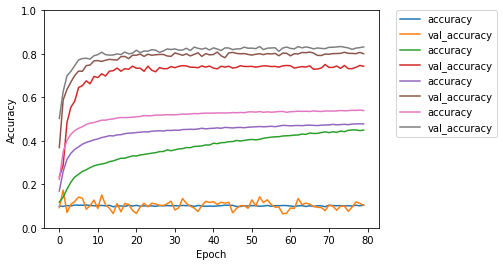

In [ ]:
       
for m in range(0,4):
        model=Mymodel()
        tf.keras.backend.clear_session()
        size=m*10000
        x_adversarial_train= np.concatenate((x_adv_F_train, x_train[:size]),axis=0)
        y_adversarial_train=np.concatenate((y_adv_train, y_train[:size]),axis=0)
        #callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=0.05, patience=10)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history_adv= model.fit(x_adversarial_train, y_adversarial_train, epochs=80,
                    verbose=1,validation_data=(x_test,y_test))#,callbacks=[callback])

        plt.plot(history_adv.history['accuracy'], label='accuracy')
        plt.plot(history_adv.history['val_accuracy'], label = 'val_accuracy')

        # Assess defended model on adversarial data
        print("Size of X_train:",size)
        print("Defended accuracy on adversarial images:", model.evaluate(x=x_adv_F_test, y=y_adv_F_test, verbose=0))
        # Assess defended model on regular data
        print("Defended accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))
        
       
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='lower right')
plt.show()

Epoch 1/30
1094/1094 [==============================] - 9s 7ms/step - loss: 2.8787 - accuracy: 0.1191 - val_loss: 2.1852 - val_accuracy: 0.2254
Epoch 2/30
1094/1094 [==============================] - 8s 7ms/step - loss: 2.4310 - accuracy: 0.1521 - val_loss: 2.2816 - val_accuracy: 0.1826
Epoch 3/30
1094/1094 [==============================] - 8s 7ms/step - loss: 2.2185 - accuracy: 0.1910 - val_loss: 2.2052 - val_accuracy: 0.1958
Epoch 4/30
1094/1094 [==============================] - 8s 7ms/step - loss: 2.1217 - accuracy: 0.2181 - val_loss: 2.2849 - val_accuracy: 0.1814
Epoch 5/30
1094/1094 [==============================] - 8s 7ms/step - loss: 2.0595 - accuracy: 0.2401 - val_loss: 2.2023 - val_accuracy: 0.2442
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 2.0246 - accuracy: 0.2556 - val_loss: 2.2678 - val_accuracy: 0.1950
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 2.0013 - accuracy: 0.2635 - val_loss: 2.3069 - val_accuracy:

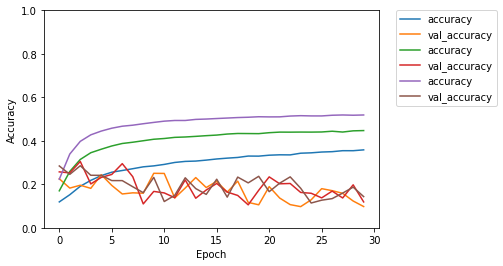

In [ ]:
for m in range(1,4):
        model=Mymodel()
        tf.keras.backend.clear_session()
        size=m*10000
        x_adversarial_train= np.concatenate((x_adv_F_train, x_train[:size]),axis=0)
        y_adversarial_train=np.concatenate((y_adv_train, y_train[:size]),axis=0)
        #callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',min_delta=0.05, patience=10)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        history_adv= model.fit(x_adversarial_train, y_adversarial_train, epochs=30,
                    verbose=1,validation_data=(x_adv_F_test_1,y_adv_F_test_1))#,callbacks=[callback])

        plt.plot(history_adv.history['accuracy'], label='accuracy')
        plt.plot(history_adv.history['val_accuracy'], label = 'val_accuracy')

        # Assess defended model on adversarial data
        print("Size of X_train:",size)
        #print("Defended accuracy on adversarial images:", model.evaluate(x=x_adv_F_test, y=y_adv_F_test, verbose=0))
        # Assess defended model on regular data
        print("Defended accuracy on regular images:", model.evaluate(x=x_test, y=y_test, verbose=0))
        
       
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='lower right')
plt.show()

In [ ]:
X=np.asarray(x_adv_T_all).reshape((2000*30, img_rows, img_cols, channels))
Y=np.asarray(y_adv_T_all).reshape((2000*30,10))

x_adversarial_train= np.concatenate((x_train, X),axis=0)
y_adversarial_train=np.concatenate((y_train, Y),axis=0)

#x_adversarial_train.shape

Epoch 1/70
55/55 [==============================] - 8s 123ms/step - loss: 2.9599 - accuracy: 0.1613 - val_loss: 2.0025 - val_accuracy: 0.3008
Epoch 2/70
55/55 [==============================] - 7s 119ms/step - loss: 2.3175 - accuracy: 0.2237 - val_loss: 2.6552 - val_accuracy: 0.1802
Epoch 3/70
55/55 [==============================] - 6s 117ms/step - loss: 2.0881 - accuracy: 0.2649 - val_loss: 3.5757 - val_accuracy: 0.1654
Epoch 4/70
55/55 [==============================] - 6s 117ms/step - loss: 1.9610 - accuracy: 0.2941 - val_loss: 3.4847 - val_accuracy: 0.1436
Epoch 5/70
55/55 [==============================] - 6s 117ms/step - loss: 1.8776 - accuracy: 0.3181 - val_loss: 3.2672 - val_accuracy: 0.1950
Epoch 6/70
55/55 [==============================] - 6s 118ms/step - loss: 1.8135 - accuracy: 0.3381 - val_loss: 3.4276 - val_accuracy: 0.2034
Epoch 7/70
55/55 [==============================] - 6s 118ms/step - loss: 1.7707 - accuracy: 0.3505 - val_loss: 2.4095 - val_accuracy: 0.2984
Epoch 

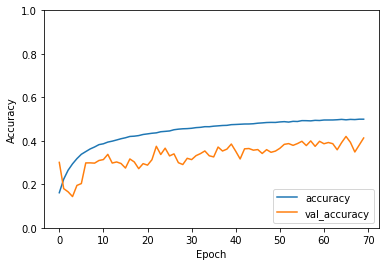

In [ ]:
model=Mymodel()
tf.keras.backend.clear_session()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_adv= model.fit(x_adversarial_train,y_adversarial_train, batch_size,epochs=70,
                    verbose=1,validation_data=(x_adv_T_test_1,y_adv_T_test_1))#,callbacks=[callback])

plt.plot(history_adv.history['accuracy'], label='accuracy')
plt.plot(history_adv.history['val_accuracy'], label = 'val_accuracy')       
       
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.show()

### Save and load trained models

In [ ]:
#model.save('RobustmodelFGSM_CFAR10.h5')
#model.save('RobustmodelTCM_CFAR10.h5')
#model = tf.keras.models.load_model('/content/Robustmodel_CFAR10.h5')
#Robust_modelTCM = tf.keras.models.load_model('/content/RobustmodelTCM_CFAR10.h5')
Robust_model_fix = tf.keras.models.load_model('/content/AdvTmodel_CFAR10.h5')

In [ ]:
Robust_modelTCM 
Robust_modelTCM.summary()
loss, acc = Robust_modelTCM.evaluate(x_test, y_test, verbose=2)
#print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('Accuracy vs Epsilon')
x = eps
y1 = np.asarray(C)
y2 = np.asarray(D)
#y3 = np.asarray(E)

plt.plot(x, y1, "-b", label="FGSM")
plt.plot(x, y2, "-r", label="Random Target")
#plt.plot(x, y3, "-g", label="Prob_Min_Target")
plt.legend(loc="upper right")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Accuracy')
#plt.ylim(-1.5, 2.0)
plt.show()

In [ ]:
print("Defended accuracy on adversarial images[FGSM]:", model.evaluate(x=x_adv_F_test_1, y=y_adv_F_test_1, verbose=0))
print("Defended accuracy on adversarial images[FGSM]:", model.evaluate(x=x_adv_F_test_2, y=y_adv_F_test_2, verbose=0))
print("Defended accuracy on adversarial images[TCM]:", model.evaluate(x=x_adv_T_test_2, y=y_adv_T_test_2, verbose=0))
print("Defended accuracy on adversarial images[TCM]:", model.evaluate(x=x_adv_T_test_1, y=y_adv_T_test_1, verbose=0))
print("Defended accuracy on test images:", model.evaluate(x=x_test,y= y_test,verbose=0))

Defended accuracy on adversarial images[FGSM]: [1.8030507564544678, 0.45100000500679016]
Defended accuracy on adversarial images[FGSM]: [1.7509061098098755, 0.4758000075817108]
Defended accuracy on adversarial images[TCM]: [1.7259178161621094, 0.4180000126361847]
Defended accuracy on adversarial images[TCM]: [1.7294777631759644, 0.4129999876022339]
Defended accuracy on test images: [0.5788764357566833, 0.8540999889373779]


In [ ]:
ACC_F_e_mix=[]
ACC_T_e_mix=[]
for i in range(0,len(eps)):
          ACC_F_e_mix=[]
          ACC_T_e_mix=[]
          y_adv_all.append(y_adv)
          print("accuracy on adversarial images [FGSM]:", round(eps[i],3), model.evaluate(x=x_adv_F_all[i], y=y_adv_all[i], verbose=0),Robust_modelTCM.evaluate(x=x_adv_F_all[i], y=y_adv_all[i], verbose=0),model.evaluate(x=x_adv_T_all[i], y=y_adv_T_all[i],verbose=0),Robust_modelTCM.evaluate(x=x_adv_T_all[i], y=y_adv_T_all[i], verbose=0))

accuracy on adversarial images [FGSM]: 0.005 [0.8735789060592651, 0.7670000195503235] [0.11606434732675552, 0.9869999885559082] [0.6170013546943665, 0.8309999704360962] [0.11808829009532928, 0.9789999723434448]
accuracy on adversarial images [FGSM]: 0.015 [1.9798755645751953, 0.5090000033378601] [0.15594050288200378, 0.9660000205039978] [1.6129080057144165, 0.5329999923706055] [0.14417169988155365, 0.9750000238418579]
accuracy on adversarial images [FGSM]: 0.025 [3.630648612976074, 0.29899999499320984] [0.2622445821762085, 0.925000011920929] [2.9385781288146973, 0.33000001311302185] [0.2247980386018753, 0.9409999847412109]
accuracy on adversarial images [FGSM]: 0.035 [4.8132100105285645, 0.19099999964237213] [0.410275936126709, 0.8799999952316284] [3.75351881980896, 0.2409999966621399] [0.3527641296386719, 0.8880000114440918]
accuracy on adversarial images [FGSM]: 0.045 [5.935146808624268, 0.1120000034570694] [0.6325651407241821, 0.8050000071525574] [4.657788276672363, 0.18700000643730

In [ ]:
ACC_F_e_mix=[]
ACC_T_e_mix=[]
for i in range(0,len(eps)):
        f=Robust_modelTCM.evaluate(x=x_adv_F_all[i], y=y_adv_all[i], verbose=0)
        t=Robust_modelTCM.evaluate(x=x_adv_T_all[i], y=y_adv_T_all[i], verbose=0)
        ACC_F_e_mix.append(f[1])
        ACC_T_e_mix.append(t[1])


In [ ]:
ACC_F_e_fix=[]
ACC_T_e_fix=[]
for i in range(0,len(eps)):
        f=Robust_model_fix.evaluate(x=x_adv_F_all[i], y=y_adv_all[i], verbose=0)
        t=Robust_model_fix.evaluate(x=x_adv_T_all[i], y=y_adv_T_all[i], verbose=0)
        ACC_F_e_fix.append(f[1])
        ACC_T_e_fix.append(t[1])


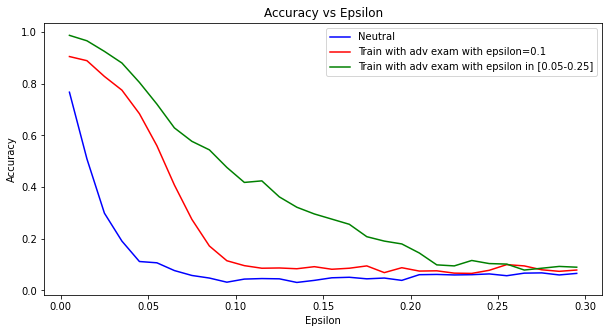

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('Accuracy vs Epsilon')
x = eps
y1 = np.asarray(C)

y3 = np.asarray(ACC_F_e_fix)
y4 = np.asarray(ACC_F_e_mix)


plt.plot(x, y1, "-b", label="Neutral")

plt.plot(x, y3, "-r", label="Train with adv exam with epsilon=0.1")
plt.plot(x, y4, "-g", label="Train with adv exam with epsilon in [0.05-0.25]")


plt.legend(loc="upper right")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Accuracy')
#plt.ylim(-1.5, 2.0)
plt.show()

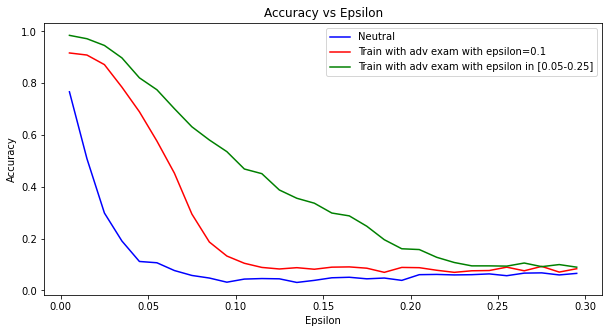

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('Accuracy vs Epsilon')
x = eps
y1 = np.asarray(C)
y2 = np.asarray(D)

y5 = np.asarray(ACC_T_e_fix)
y6 = np.asarray(ACC_T_e_mix)


plt.plot(x, y1, "-b", label="Neutral")

plt.plot(x, y5, "-r", label="Train with adv exam with epsilon=0.1")
plt.plot(x, y6, "-g", label="Train with adv exam with epsilon in [0.05-0.25]")

plt.legend(loc="upper right")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Accuracy')
#plt.ylim(-1.5, 2.0)
plt.show()

#Defense Distillation_CFAR10

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [ ]:
# Create the teacher
teacher = Mymodel()
# Create the student
student = Mymodel()
# Clone student for later comparison
student_scratch = keras.models.clone_model(student)

In [ ]:
# Prepare the train and test dataset.

from tensorflow.keras.datasets import cifar10, cifar100
import numpy as np
batch_size = 64

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/ 255.0
x_train = np.reshape(x_train, (-1, 32, 32, 3))

x_test = x_test.astype('float32')/ 255.0
x_test = np.reshape(x_test, (-1, 32, 32, 3))

In [ ]:
# Train teacher as usual
teacher.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

# Train and evaluate teacher on data.
teacher.fit(x_train, y_train, epochs=30)
teacher.evaluate(x_test, y_test)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 14s 8ms/step - loss: 1.6380 - sparse_categorical_accuracy: 0.4956
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0372 - sparse_categorical_accuracy: 0.6650
Epoch 3/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8827 - sparse_categorical_accuracy: 0.7199
Epoch 4/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8067 - sparse_categorical_accuracy: 0.7523
Epoch 5/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7560 - sparse_categorical_accuracy: 0.7744
Epoch 6/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7205 - sparse_categorical_accuracy: 0.7945
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6949 - sparse_categorical_accuracy: 0.8087
Epoch 8/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6794 - sparse_categorical_accuracy: 0.8176
Epoch 9/30
1563/1563 [=============

[0.7089838981628418, 0.8478000164031982]

In [ ]:
# Initialize and compile distiller
distiller = Distiller(student=student, teacher=teacher)
distiller.compile(
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    student_loss_fn=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    distillation_loss_fn=keras.losses.KLDivergence(),
    alpha=0.1,
    temperature=40,
)

# Distill teacher to student
history_adv= distiller.fit(x_train,y_train, batch_size,epochs=20,
                      verbose=1)#,callbacks=[callback])

tf.keras.backend.clear_session()
distiller.fit(x_train, y_train, epochs=30)

# Evaluate student on test dataset
distiller.evaluate(x_test, y_test)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 9s 10ms/step - sparse_categorical_accuracy: 0.4769 - student_loss: 1.6513 - distillation_loss: 1.8337e-05
Epoch 2/20
782/782 [==============================] - 7s 10ms/step - sparse_categorical_accuracy: 0.6509 - student_loss: 1.0292 - distillation_loss: 1.1365e-05
Epoch 3/20
782/782 [==============================] - 7s 10ms/step - sparse_categorical_accuracy: 0.7073 - student_loss: 0.8487 - distillation_loss: 9.1331e-06
Epoch 4/20
782/782 [==============================] - 7s 10ms/step - sparse_categorical_accuracy: 0.7413 - student_loss: 0.7506 - distillation_loss: 7.8884e-06
Epoch 5/20
782/782 [==============================] - 7s 10ms/step - sparse_categorical_accuracy: 0.7638 - student_loss: 0.6740 - distillation_loss: 7.0435e-06
Epoch 6/20
782/782 [==============================] - 7s 10ms/step - sparse_categorical_accuracy: 0.7861 - student_loss: 0.6108 - distillation_loss: 6.3221e-06
Epoch 7/20
782/782 [==============================]

[0.8619999885559082, 0.5112137198448181]

In [ ]:
#ACC_attF_distiller_T10=[]
#ACC_attF_distiller_T20=[]
ACC_attF_distiller_T40=[]

for i in range(0,len(eps)):
        F=np.argmax(y_adv_all[i], axis=1, out=None)
        F=F.reshape(1000,1)
        d=distiller.evaluate(x=x_adv_F_all[i], y=F, verbose=0)
        #ACC_attF_distiller_T10.append(d[0])
        #ACC_attF_distiller_T20.append(d[0])
        ACC_attF_distiller_T40.append(d[0])


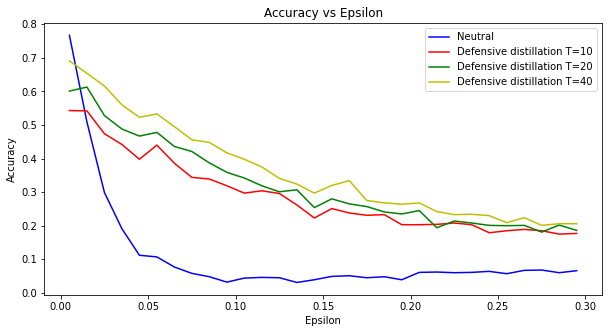

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('Accuracy vs Epsilon')
x = eps
y1 = np.asarray(C)

y7 = np.asarray(ACC_attF_distiller_T10)
y8 = np.asarray(ACC_attF_distiller_T20)
y9 = np.asarray(ACC_attF_distiller_T40)


plt.plot(x, y1, "-b", label="Neutral")

plt.plot(x, y7, "-r", label="Defensive distillation T=10")
plt.plot(x, y8, "-g", label="Defensive distillation T=20")
plt.plot(x, y9, "-y", label="Defensive distillation T=40")


plt.legend(loc="upper right")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Accuracy')
#plt.ylim(-1.5, 2.0)
plt.show()

In [ ]:
distiller.evaluate(x_test, y_test)

 29/313 [=>............................] - ETA: 1s - sparse_categorical_accuracy: 0.8502 - student_loss: 0.4931

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 4ms/step - sparse_categorical_accuracy: 0.8480 - student_loss: 0.4860


[0.8479999899864197, 0.633246898651123]

In [ ]:
# Train student as doen usually
student_scratch.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

# Train and evaluate student trained from scratch.
student_scratch.fit(x_train, y_train, epochs=3)
student_scratch.evaluate(x_test, y_test)